<a href="https://colab.research.google.com/github/rmizan/BigData/blob/master/Sentiment_With_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# utilities
import re  # for regular expressions
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [3]:
# Loading and reading data
df = pd.read_csv('/content/drive/MyDrive/ML_DATA/covid_tweets.csv', encoding='latin-1')
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
# Columns/features in data
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [5]:
# Length of the dataset
print('length of data is', len(df))

length of data is 41157


In [6]:
# Shape of data
df. shape

(41157, 6)

In [7]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [8]:
# Datatypes of all columns
df.dtypes

,0
UserName,int64
ScreenName,int64
Location,object
TweetAt,object
OriginalTweet,object
Sentiment,object


In [9]:
# Checking for null values
np.sum(df.isnull().any(axis=1))

8590

In [10]:
# Rows and columns in the dataset
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   6
Count of rows in the data is:   41157


In [11]:
# Check unique target values
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [12]:
# Check the number of target values
df['Sentiment'].nunique()

5

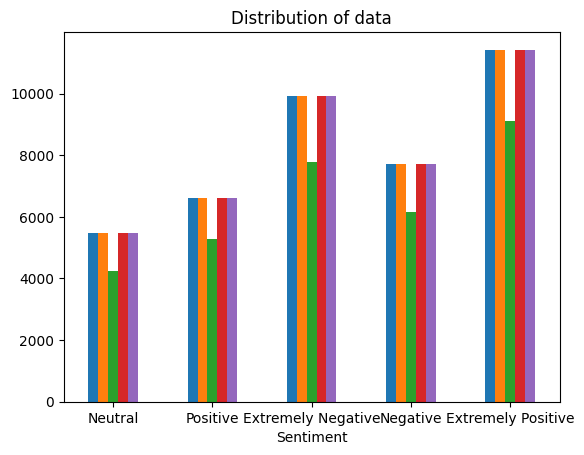

In [13]:
# Data Visualization of Target Variables
# Plotting the distribution for dataset.
ax = df.groupby('Sentiment').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], rotation=0)
# Storing data in lists.
OriginalTweet, sentiment = list(df['OriginalTweet']), list(df['Sentiment'])

In [14]:
# Selecting features/variables
data=df[['OriginalTweet','Sentiment']]
data.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


<ipython-input-15-70e69be24790>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, x='Sentiment', palette=custom_palette)


<Axes: xlabel='Sentiment', ylabel='count'>

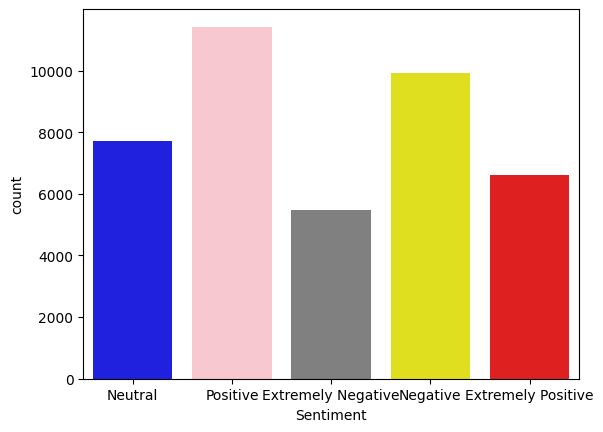

In [15]:
# Data Visualization of Target Variables
custom_palette = ["blue", "pink", "gray", "yellow", "red"]
sns.countplot(data, x='Sentiment', palette=custom_palette)
#sns.countplot(x = y)

In [16]:
data['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [17]:
# converting Sentiment value from object to int
# Create a mapping dictionary
mapping = {'Extremely Negative':1, 'Negative': 2, 'Neutral':3, 'Positive': 4,'Extremely Positive':5}
# Assign integer values based on the mapping
data['sentiment_int'] = data['Sentiment'].map(mapping)
data.head()

<ipython-input-17-93b162ccaa27>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment_int'] = data['Sentiment'].map(mapping)


,OriginalTweet,Sentiment,sentiment_int
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,3
1,advice Talk to your neighbours family to excha...,Positive,4
2,Coronavirus Australia: Woolworths to give elde...,Positive,4
3,My food stock is not the only one which is emp...,Positive,4
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,1


In [18]:
data=data[['OriginalTweet','sentiment_int']]
data.head()

,OriginalTweet,sentiment_int
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,3
1,advice Talk to your neighbours family to excha...,4
2,Coronavirus Australia: Woolworths to give elde...,4
3,My food stock is not the only one which is emp...,4
4,"Me, ready to go at supermarket during the #COV...",1


In [19]:
# Check unique target values
data['sentiment_int'].unique()

array([3, 4, 1, 2, 5])

In [20]:
# Check the number of target values
data['sentiment_int'].nunique()

5

<ipython-input-21-28d9b428cbfa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, x='sentiment_int', palette=custom_palette)


<Axes: xlabel='sentiment_int', ylabel='count'>

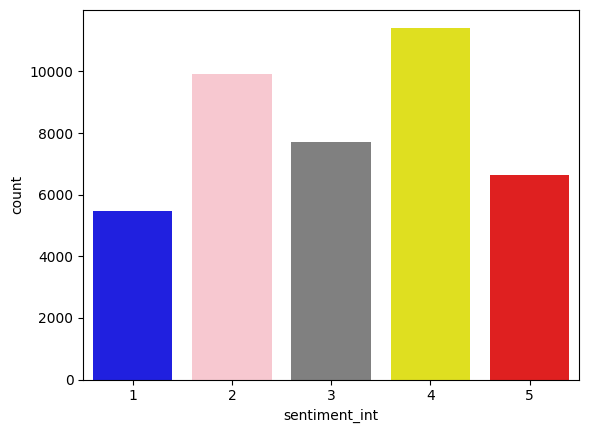

In [21]:
# Data Visualization of Target Variables
custom_palette = ["blue", "pink", "gray", "yellow", "red"]
sns.countplot(data, x='sentiment_int', palette=custom_palette)
#sns.countplot(x = y)

In [22]:
# Binary classification of Sentiment values
data['sentiment_int'] = np.where(data['sentiment_int'] <= 3, 0, 1)
data.head()

,OriginalTweet,sentiment_int
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0
1,advice Talk to your neighbours family to excha...,1
2,Coronavirus Australia: Woolworths to give elde...,1
3,My food stock is not the only one which is emp...,1
4,"Me, ready to go at supermarket during the #COV...",0


In [23]:
#Separating positive and negative tweets
data_pos = data[data['sentiment_int'] == 1]
data_neg = data[data['sentiment_int'] == 0]

In [24]:
# Taking one-fourth of the data so we can run it on our machine easily
data_pos = data_pos.iloc[:int(10000)]
data_neg = data_neg.iloc[:int(10000)]

In [27]:
# Combining positive and negative tweets
dataset = pd.concat([data_pos, data_neg])
dataset

,OriginalTweet,sentiment_int
1,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...,1
2,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",1
3,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\...",1
5,"As news of the regionÂs first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and ot...",1
6,"Cashier at grocery store was sharing his insights on #Covid_19 To prove his credibility he commented ""I'm in Civics class so I know what I'm talking about"". https://t.co/ieFDNeHgDO",1
...,...,...
17274,If you receive suspicious related calls emails or visitors asking for personal information usernames passwords sharing strange links or offering testing kits vaccines etc do not engage further Mor...,0
17277,As Personal Protective Equipment PPE runs low people have gone to their dungeon closets to find protection,0
17278,Greedy @Airbnb why are you allowing people to book extended stays in Idyllwild &amp; Joshua Tree CA? Tiny grocery store for residents &amp; no way to handle illness w/ am local hospital. Gov Newso...,0
17280,What s wrong with people doesn t mean a holiday in,0


In [28]:
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [29]:
# Making statement text in lowercase
dataset['OriginalTweet']=dataset['OriginalTweet'].str.lower()
dataset['OriginalTweet'].head()

,OriginalTweet
1,advice talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist gp set up online shopping accounts if poss adequate su...
2,"coronavirus australia: woolworths to give elderly, disabled dedicated shopping hours amid covid-19 outbreak https://t.co/binca9vp8p"
3,"my food stock is not the only one which is empty...\r\r\n\r\r\nplease, don't panic, there will be enough food for everyone if you do not take more than you need. \r\r\nstay calm, stay safe.\r\r\n\..."
5,"as news of the regionâs first confirmed covid-19 case came out of sullivan county last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and ot..."
6,"cashier at grocery store was sharing his insights on #covid_19 to prove his credibility he commented ""i'm in civics class so i know what i'm talking about"". https://t.co/iefdnehgdo"


In [30]:
# importing and downloading all stopwords
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data]   Unzipping corpora/stopwords.zip.


In [31]:
# Cleaning and removing the above stop words list from the tweet text
stop_words = set(stopwords.words('english'))
def cleaning_stopwords(OriginalTweet):
    return " ".join([word for word in str(OriginalTweet).split() if word not in stop_words])
dataset['OriginalTweet'] = dataset['OriginalTweet'].apply(lambda OriginalTweet: cleaning_stopwords(OriginalTweet))
dataset['OriginalTweet'].head()

,OriginalTweet
1,advice talk neighbours family exchange phone numbers create contact list phone numbers neighbours schools employer chemist gp set online shopping accounts poss adequate supplies regular meds order
2,"coronavirus australia: woolworths give elderly, disabled dedicated shopping hours amid covid-19 outbreak https://t.co/binca9vp8p"
3,"food stock one empty... please, panic, enough food everyone take need. stay calm, stay safe. #covid19france #covid_19 #covid19 #coronavirus #confinement #confinementotal #confinementgeneral https:..."
5,"news regionâs first confirmed covid-19 case came sullivan county last week, people flocked area stores purchase cleaning supplies, hand sanitizer, food, toilet paper goods, @tim_dodson reports ht..."
6,"cashier grocery store sharing insights #covid_19 prove credibility commented ""i'm civics class know i'm talking about"". https://t.co/iefdnehgdo"


In [32]:
# user-defined function to remove unwanted text patterns from the tweets. It takes two arguments, one is the original string of text and
# the other is the pattern of text that we want to remove from the string. The function returns the same input string but without the given
# pattern. This function will be used to remove the pattern ‘@user’ from all the tweets in our data.

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [33]:
# Removing Twitter Handles (@user)
dataset['OriginalTweet'] = np.vectorize(remove_pattern)(dataset['OriginalTweet'], "@[\w]*")
dataset.head()

,OriginalTweet,sentiment_int
1,advice talk neighbours family exchange phone numbers create contact list phone numbers neighbours schools employer chemist gp set online shopping accounts poss adequate supplies regular meds order,1
2,"coronavirus australia: woolworths give elderly, disabled dedicated shopping hours amid covid-19 outbreak https://t.co/binca9vp8p",1
3,"food stock one empty... please, panic, enough food everyone take need. stay calm, stay safe. #covid19france #covid_19 #covid19 #coronavirus #confinement #confinementotal #confinementgeneral https:...",1
5,"news regionâs first confirmed covid-19 case came sullivan county last week, people flocked area stores purchase cleaning supplies, hand sanitizer, food, toilet paper goods, reports https://t.co/...",1
6,"cashier grocery store sharing insights #covid_19 prove credibility commented ""i'm civics class know i'm talking about"". https://t.co/iefdnehgdo",1


In [34]:
#Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(OriginalTweet):
    translator = str.maketrans('', '', punctuations_list)
    return OriginalTweet.translate(translator)
dataset['OriginalTweet']= dataset['OriginalTweet'].apply(lambda x: cleaning_punctuations(x))
dataset['OriginalTweet'].head()

,OriginalTweet
1,advice talk neighbours family exchange phone numbers create contact list phone numbers neighbours schools employer chemist gp set online shopping accounts poss adequate supplies regular meds order
2,coronavirus australia woolworths give elderly disabled dedicated shopping hours amid covid19 outbreak httpstcobinca9vp8p
3,food stock one empty please panic enough food everyone take need stay calm stay safe covid19france covid19 covid19 coronavirus confinement confinementotal confinementgeneral httpstcozrlg0z520j
5,news regionâs first confirmed covid19 case came sullivan county last week people flocked area stores purchase cleaning supplies hand sanitizer food toilet paper goods reports httpstcocfxch7a2lu
6,cashier grocery store sharing insights covid19 prove credibility commented im civics class know im talking about httpstcoiefdnehgdo


In [35]:
#  Cleaning and removing repeating characters
def cleaning_repeating_char(OriginalTweet):
    return re.sub(r'(.)1+', r'1', OriginalTweet)
dataset['OriginalTweet'] = dataset['OriginalTweet'].apply(lambda x: cleaning_repeating_char(x))
dataset['OriginalTweet'].tail()

,OriginalTweet
17274,receive suspicious related calls emails visitors asking personal information usernames passwords sharing strange links offering testing kits vaccines etc engage
17277,personal protective equipment ppe runs low people gone dungeon closets find protection
17278,greedy allowing people book extended stays idyllwild amp joshua tree ca tiny grocery store residents amp way handle illness w local hospital gov newsom order covidiots covi19 coronavirus californ...
17280,wrong people mean holiday
17282,âi ran toilet paper begun using old newspapersâ times roughâ redditdadjokes march18 ny times sometimes called toilet paper record jokes puns toiletpaper coronavirus httpstcoz77p74gugc


In [36]:
# Cleaning and removing URLs
def cleaning_URLs(dataset):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',dataset)
dataset['OriginalTweet'] = dataset['OriginalTweet'].apply(lambda x: cleaning_URLs(x))
dataset['OriginalTweet'].head()

,OriginalTweet
1,advice talk neighbours family exchange phone numbers create contact list phone numbers neighbours schools employer chemist gp set online shopping accounts poss adequate supplies regular meds order
2,coronavirus australia woolworths give elderly disabled dedicated shopping hours amid covi19 outbreak httpstcobinca9vp8p
3,food stock one empty please panic enough food everyone take need stay calm stay safe covi19france covi19 covi19 coronavirus confinement confinementotal confinementgeneral httpstcozrlg0z520j
5,news regionâs first confirmed covi19 case came sullivan county last week people flocked area stores purchase cleaning supplies hand sanitizer food toilet paper goods reports httpstcocfxch7a2lu
6,cashier grocery store sharing insights covi19 prove credibility commented im civics class know im talking about httpstcoiefdnehgdo


In [37]:
# Cleaning and removing numeric numbers
def cleaning_numbers(dataset):
    return re.sub('[0-9]+', '', dataset)
dataset['OriginalTweet'] = dataset['OriginalTweet'].apply(lambda x: cleaning_numbers(x))
dataset['OriginalTweet'].head()

,OriginalTweet
1,advice talk neighbours family exchange phone numbers create contact list phone numbers neighbours schools employer chemist gp set online shopping accounts poss adequate supplies regular meds order
2,coronavirus australia woolworths give elderly disabled dedicated shopping hours amid covi outbreak httpstcobincavpp
3,food stock one empty please panic enough food everyone take need stay calm stay safe covifrance covi covi coronavirus confinement confinementotal confinementgeneral httpstcozrlgzj
5,news regionâs first confirmed covi case came sullivan county last week people flocked area stores purchase cleaning supplies hand sanitizer food toilet paper goods reports httpstcocfxchalu
6,cashier grocery store sharing insights covi prove credibility commented im civics class know im talking about httpstcoiefdnehgdo


In [38]:
# Getting tokenization of tweet text
tokenized_tweet = dataset.OriginalTweet.apply(lambda x: x.split())
tokenized_tweet.head()

,OriginalTweet
1,"[advice, talk, neighbours, family, exchange, phone, numbers, create, contact, list, phone, numbers, neighbours, schools, employer, chemist, gp, set, online, shopping, accounts, poss, adequate, sup..."
2,"[coronavirus, australia, woolworths, give, elderly, disabled, dedicated, shopping, hours, amid, covi, outbreak, httpstcobincavpp]"
3,"[food, stock, one, empty, please, panic, enough, food, everyone, take, need, stay, calm, stay, safe, covifrance, covi, covi, coronavirus, confinement, confinementotal, confinementgeneral, httpstco..."
5,"[news, regionâs, first, confirmed, covi, case, came, sullivan, county, last, week, people, flocked, area, stores, purchase, cleaning, supplies, hand, sanitizer, food, toilet, paper, goods, report..."
6,"[cashier, grocery, store, sharing, insights, covi, prove, credibility, commented, im, civics, class, know, im, talking, about, httpstcoiefdnehgdo]"


In [39]:
# Applying stemming
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

,OriginalTweet
1,"[advic, talk, neighbour, famili, exchang, phone, number, creat, contact, list, phone, number, neighbour, school, employ, chemist, gp, set, onlin, shop, account, poss, adequ, suppli, regular, med, ..."
2,"[coronaviru, australia, woolworth, give, elderli, disabl, dedic, shop, hour, amid, covi, outbreak, httpstcobincavpp]"
3,"[food, stock, one, empti, pleas, panic, enough, food, everyon, take, need, stay, calm, stay, safe, covifr, covi, covi, coronaviru, confin, confinementot, confinementgener, httpstcozrlgzj]"
5,"[news, regionâ, first, confirm, covi, case, came, sullivan, counti, last, week, peopl, flock, area, store, purchas, clean, suppli, hand, sanit, food, toilet, paper, good, report, httpstcocfxchalu]"
6,"[cashier, groceri, store, share, insight, covi, prove, credibl, comment, im, civic, class, know, im, talk, about, httpstcoiefdnehgdo]"


In [40]:
# Applying lemmatizer
import nltk
nltk.download('wordnet')
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['OriginalTweet'] = dataset['OriginalTweet'].apply(lambda x: lemmatizer_on_text(x))
dataset['OriginalTweet'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,OriginalTweet
1,advice talk neighbours family exchange phone numbers create contact list phone numbers neighbours schools employer chemist gp set online shopping accounts poss adequate supplies regular meds order
2,coronavirus australia woolworths give elderly disabled dedicated shopping hours amid covi outbreak httpstcobincavpp
3,food stock one empty please panic enough food everyone take need stay calm stay safe covifrance covi covi coronavirus confinement confinementotal confinementgeneral httpstcozrlgzj
5,news regionâs first confirmed covi case came sullivan county last week people flocked area stores purchase cleaning supplies hand sanitizer food toilet paper goods reports httpstcocfxchalu
6,cashier grocery store sharing insights covi prove credibility commented im civics class know im talking about httpstcoiefdnehgdo


In [41]:
# Removing Short Words
dataset.OriginalTweet = dataset.OriginalTweet.apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))
dataset['OriginalTweet'].head()

,OriginalTweet
1,advice talk neighbours family exchange phone numbers create contact list phone numbers neighbours schools employer chemist online shopping accounts poss adequate supplies regular meds order
2,coronavirus australia woolworths give elderly disabled dedicated shopping hours amid covi outbreak httpstcobincavpp
3,food stock empty please panic enough food everyone take need stay calm stay safe covifrance covi covi coronavirus confinement confinementotal confinementgeneral httpstcozrlgzj
5,news regionâs first confirmed covi case came sullivan county last week people flocked area stores purchase cleaning supplies hand sanitizer food toilet paper goods reports httpstcocfxchalu
6,cashier grocery store sharing insights covi prove credibility commented civics class know talking about httpstcoiefdnehgdo


In [42]:
dataset.head()

,OriginalTweet,sentiment_int
1,advice talk neighbours family exchange phone numbers create contact list phone numbers neighbours schools employer chemist online shopping accounts poss adequate supplies regular meds order,1
2,coronavirus australia woolworths give elderly disabled dedicated shopping hours amid covi outbreak httpstcobincavpp,1
3,food stock empty please panic enough food everyone take need stay calm stay safe covifrance covi covi coronavirus confinement confinementotal confinementgeneral httpstcozrlgzj,1
5,news regionâs first confirmed covi case came sullivan county last week people flocked area stores purchase cleaning supplies hand sanitizer food toilet paper goods reports httpstcocfxchalu,1
6,cashier grocery store sharing insights covi prove credibility commented civics class know talking about httpstcoiefdnehgdo,1


In [43]:
# Separating input feature and label
X=data.OriginalTweet
y=data.sentiment_int

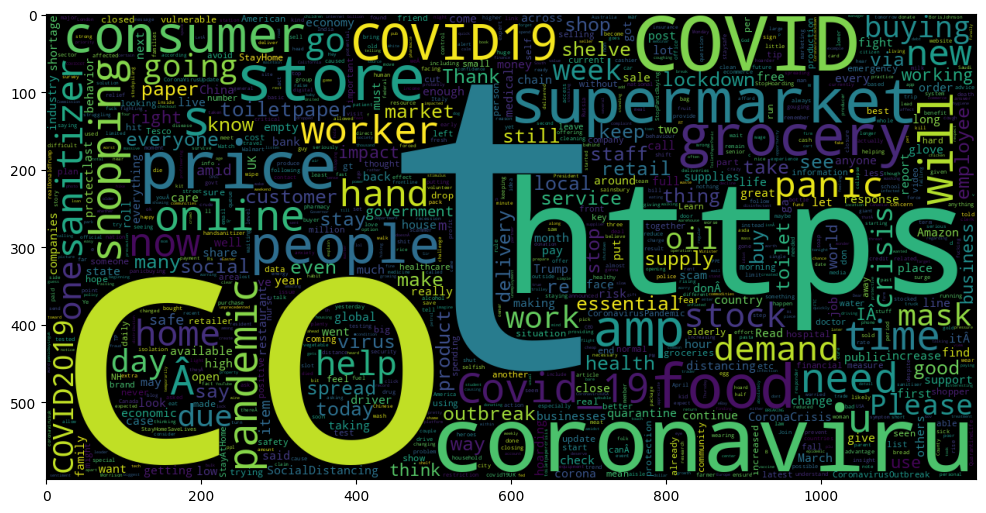

In [46]:
# Plot a cloud of words for negative tweets
data_neg = data['OriginalTweet'][:800000]
plt.figure(figsize = (12, 12))
wc = WordCloud(max_words = 1000 , width = 1200 , height = 600,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

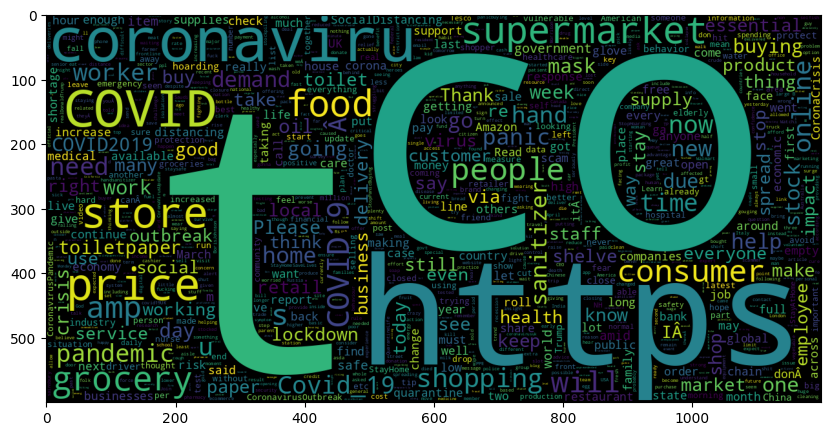

In [47]:
# Plot a cloud of words for positive tweets
data_pos = data['OriginalTweet'][:800000]
plt.figure(figsize = (10, 12))
wc = WordCloud(max_words = 1000 , width = 1200 , height = 600,
            collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)

In [48]:
# Separating the 97% data for training data and 3% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.03, random_state =26105111)

In [49]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(41157,)
(39922,)
(1235,)


In [50]:
# Fit the TF-IDF Vectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=600000)
vectoriser.fit(X_train)
#print('No. of feature_words:', len(vectoriser.get_feature_names()))

TfidfVectorizer(max_features=600000, ngram_range=(1, 2))

In [51]:
# Transform the data using TF-IDF Vectorizer
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [52]:
# Defining function for model evaluation
def model_Evaluate(model):
# Predict values for Test dataset
  y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))

In [68]:
# Model 1 Optional
# Bernoulli Naive Bayes function
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.71      0.95      0.81       730
           1       0.86      0.43      0.57       505

    accuracy                           0.74      1235
   macro avg       0.78      0.69      0.69      1235
weighted avg       0.77      0.74      0.71      1235



In [67]:
# Model 2
# Fit the LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       730
           1       0.83      0.84      0.83       505

    accuracy                           0.86      1235
   macro avg       0.86      0.86      0.86      1235
weighted avg       0.86      0.86      0.86      1235



In [69]:
# Model 3
# Train the SVM model
from sklearn import svm
from sklearn import metrics
model = svm.SVC(gamma = 'scale', kernel='linear')
#model = model.SVC(kernel='linear')
# Fit the SVM model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred3 = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       730
           1       0.83      0.83      0.83       505

    accuracy                           0.86      1235
   macro avg       0.85      0.86      0.86      1235
weighted avg       0.86      0.86      0.86      1235



In [74]:
predicted = model.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)
print("Accuracuy Score: ",accuracy_score)

Accuracuy Score:  0.8599190283400809


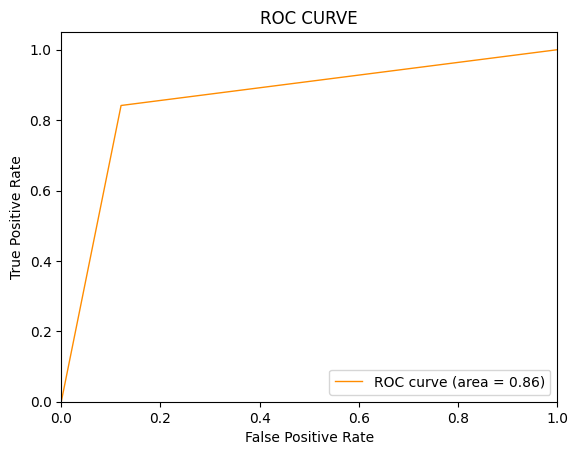

In [66]:
# Plotting predicted probabilities for the positive class using predict_proba
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [71]:
y_pred = SVCmodel.predict(X_test)
cm = confusion_matrix(y_pred,y_test)
cm

array([[642,  80],
       [ 88, 425]])

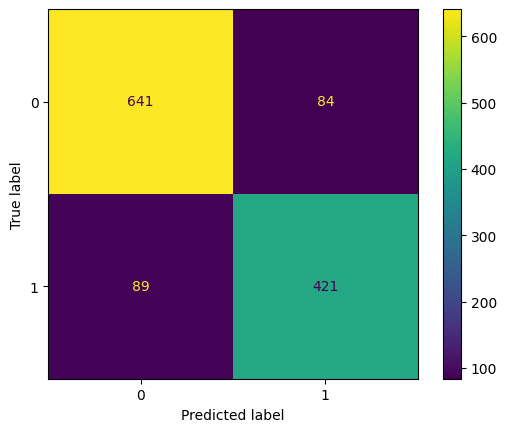

In [73]:
ConfusionMatrixDisplay(cm, display_labels = model.classes_ ).plot()